In [161]:
from nilearn.decomposition import CanICA
from nilearn import plotting #nilearn 图像功能
from nilearn import image, datasets
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [118]:
# my own data
practice_path = 'D:/wangsiyu/data/AudioCartography/'
anat_data_01_path = practice_path + '/sub-01' + '/anat' + '/sub-01_T1w.nii.gz'
anat_data_01_mni_path = practice_path + '/sub-01' + '/tlrc' + ''
# dataset provided by module
dataset_haxby = datasets.fetch_haxby() #haxby dataset
template_MNI152 = datasets.MNI152_FILE_PATH #MNI152 template
atlas_harvard = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm') #harvard_oxford atlas
stat_motor = datasets.fetch_neurovault_motor_task() #motor_task dataset
dataset_smith_atlas_brainmap = datasets.fetch_atlas_smith_2009()# Smith ICA and BrainMap atlas
dataset_rsn10 = dataset_smith_atlas_brainmap.rsn10
dataset_adhd = datasets.fetch_adhd(n_subjects = 30)


Dataset created in C:\Users\kumad/nilearn_data\adhd



 ...done. (1 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\fbef5baff0b388a8c913a08e1d84e059\adhd40_metadata.tgz..... done.


Downloaded 35233792 of 44414948 bytes (79.3%,    1.1s remaining) ...done. (5 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0010042.tgz..... done.


Downloaded 43081728 of 45583539 bytes (94.5%,    0.4s remaining) ...done. (8 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0010064.tgz..... done.


Downloaded 42967040 of 45461055 bytes (94.5%,    0.5s remaining) ...done. (10 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0010128.tgz..... done.


Downloaded 43081728 of 46216320 bytes (93.2%,    0.8s remaining) ...done. (12 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0021019.tgz..... done.


Downloaded 16556032 of 20407901 bytes (81.1%,    0.9s remaining) ...done. (5 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0023008.tgz..... done.


Downloaded 19341312 of 20706939 bytes (93.4%,    0.4s remaining) ...done. (6 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0023012.tgz..... done.


Downloaded 71360512 of 72402326 bytes (98.6%,    0.3s remaining) ...done. (18 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0027011.tgz..... done.


Downloaded 74465280 of 76184603 bytes (97.7%,    0.3s remaining) ...done. (14 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0027018.tgz..... done.


Downloaded 69173248 of 70074120 bytes (98.7%,    0.2s remaining) ...done. (15 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0027034.tgz..... done.


Downloaded 63791104 of 69291635 bytes (92.1%,    1.0s remaining) ...done. (12 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_0027037.tgz..... done.


Downloaded 41730048 of 41803342 bytes (99.8%,    0.0s remaining) ...done. (14 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1019436.tgz..... done.


Downloaded 19988480 of 20763649 bytes (96.3%,    0.4s remaining) ...done. (10 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1206380.tgz..... done.


Downloaded 18169856 of 20168043 bytes (90.1%,    0.7s remaining) ...done. (7 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1418396.tgz..... done.


Downloaded 58728448 of 62682233 bytes (93.7%,    0.8s remaining) ...done. (13 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1517058.tgz..... done.


Downloaded 20021248 of 20196558 bytes (99.1%,    0.0s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1552181.tgz..... done.


Downloaded 56049664 of 60663491 bytes (92.4%,    0.9s remaining) ...done. (12 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1562298.tgz..... done.


Downloaded 16916480 of 20628764 bytes (82.0%,    0.7s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_1679142.tgz..... done.


Downloaded 29024256 of 33119052 bytes (87.6%,    0.6s remaining) ...done. (5 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_2014113.tgz..... done.


Downloaded 34725888 of 45455025 bytes (76.4%,    0.9s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_2497695.tgz..... done.


Downloaded 47038464 of 57992968 bytes (81.1%,    0.7s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_2950754.tgz..... done.


Downloaded 49790976 of 67925261 bytes (73.3%,    1.1s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3007585.tgz..... done.


Downloaded 24969216 of 32919780 bytes (75.8%,    0.6s remaining) ...done. (3 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3154996.tgz..... done.


Downloaded 55926784 of 59835286 bytes (93.5%,    0.3s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3205761.tgz..... done.


Downloaded 58638336 of 61857076 bytes (94.8%,    0.2s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3520880.tgz..... done.


Downloaded 55189504 of 59385206 bytes (92.9%,    0.4s remaining) ...done. (6 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3624598.tgz..... done.


Downloaded 34496512 of 41518251 bytes (83.1%,    0.6s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3699991.tgz..... done.


Downloaded 22151168 of 32108848 bytes (69.0%,    0.9s remaining) ...done. (3 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3884955.tgz..... done.


Downloaded 36356096 of 39415752 bytes (92.2%,    0.3s remaining) ...done. (4 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3902469.tgz..... done.


Downloaded 55631872 of 59297020 bytes (93.8%,    0.4s remaining) ...done. (7 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_3994098.tgz..... done.


Downloaded 18620416 of 20157314 bytes (92.4%,    0.2s remaining) ...done. (2 seconds, 0 min)
Extracting data from C:\Users\kumad/nilearn_data\adhd\1195d4b51afa739d0af4c7d508e1f39a\adhd40_4016887.tgz..... done.


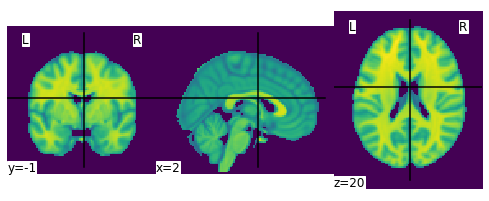

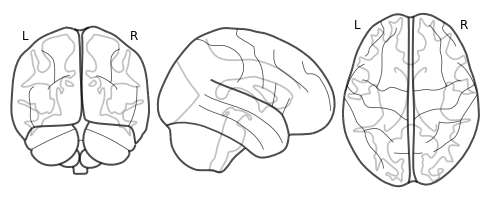

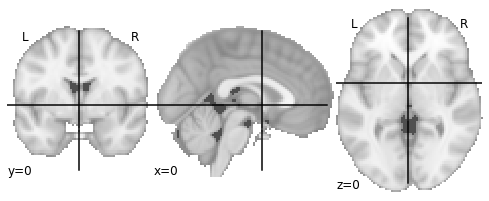

In [66]:
# show the effect of plotting function
plotting.plot_img(template_MNI152)                        # to draw 3D figure
plotting.plot_glass_brain(stat_map_img=None)              # MNI152 glass template，set stat_map_img as None, it's suitable to draw network.
plotting.plot_roi(roi_img=None)                           # MNI152 template full brain, including celebrum and others. it's suitable for roi mask.
#plotting.plot_stat_map(stat_map_img=)                 # specialized figure for statistic 

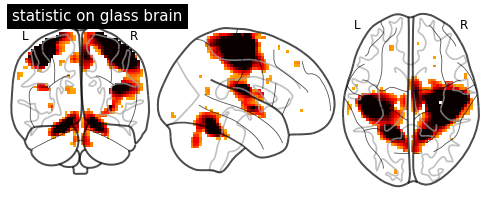

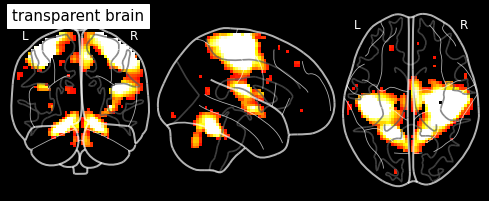

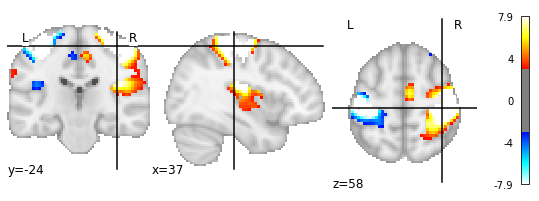

In [70]:
plotting.plot_glass_brain(stat_motor.images[0], threshold=3, title = 'statistic on glass brain')
plotting.plot_glass_brain(stat_motor.images[0], title = 'transparent brain', black_bg = True, threshold=3)
plotting.plot_stat_map(stat_motor.images[0], threshold=3)

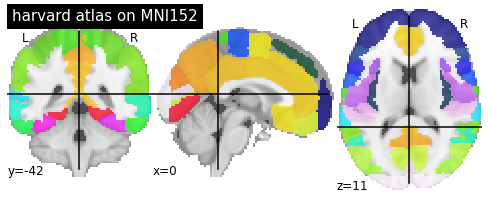

In [59]:
plotting.plot_roi(roi_img = atlas_harvard.maps, title = 'harvard atlas on MNI152') # draw the atlas_harvard on it

(91, 109, 91)


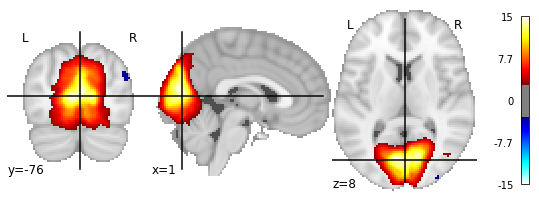

In [112]:
first_rsn = image.index_img(dataset_rsn10, 0)
print(first_rsn.shape)
plotting.plot_stat_map(first_rsn, threshold=3)

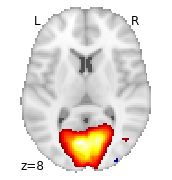

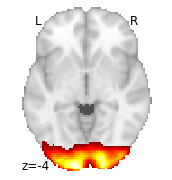

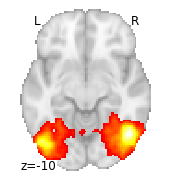

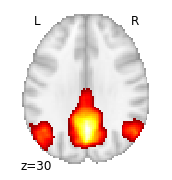

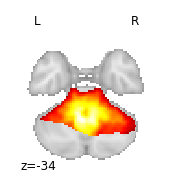

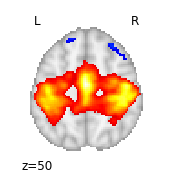

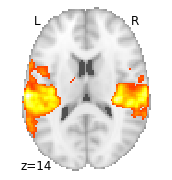

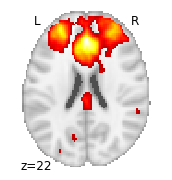

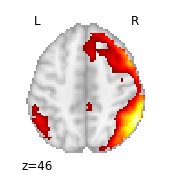

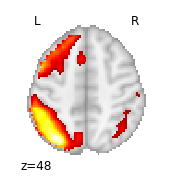

In [114]:
for img in image.iter_img(dataset_rsn10):
    plotting.plot_stat_map(img, threshold=3, display_mode='z', cut_coords=1, colorbar = False)

In [157]:
func_list = dataset_adhd.func
print(image.load_img(func_list[0]).shape)
print(image.get_data(func_list[0]).shape)

(61, 73, 61, 176)
(61, 73, 61, 176)


In [159]:
#canica = CanICA(n_components=20, smoothing_fwhm=6., threshold=3., verbose=10, random_state=0)
# canica.fit(func_list)
canica_components_img = canica.components_img_                              # get a nifti-like object
canica_components_img.to_filename('canica_resting_state.nii.gz')            # binary dataset

In [153]:
print(image.get_data(canica_components_img).shape)
canica_components_img_0 = image.index_img(canica_components_img, 0)

(61, 73, 61, 20)


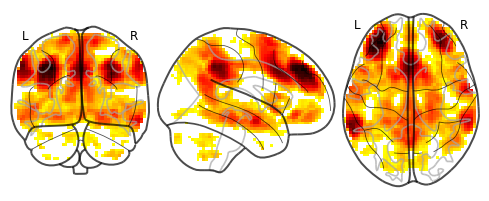

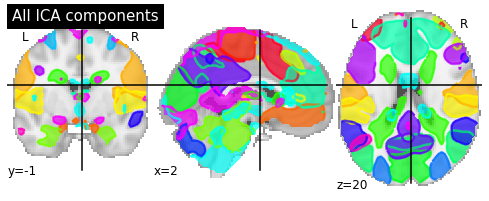

In [165]:
plotting.plot_glass_brain(canica_components_img_0) # show one component on glass brain
plotting.plot_prob_atlas(canica_components_img, title='All ICA components' ) # this is the prob_atlas template, draw all the components on prob_atlas

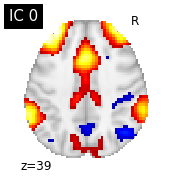

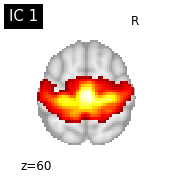

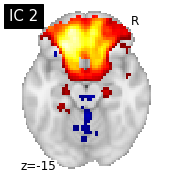

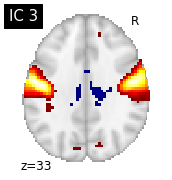

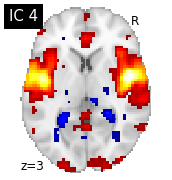

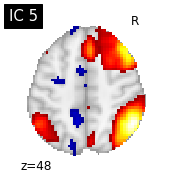

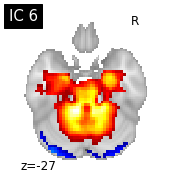

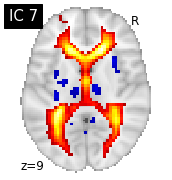

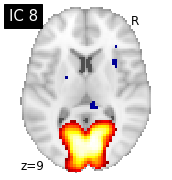

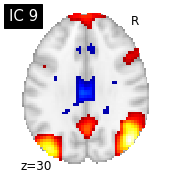

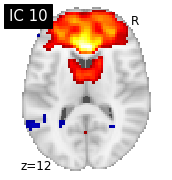

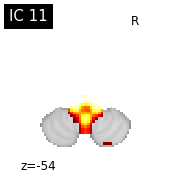

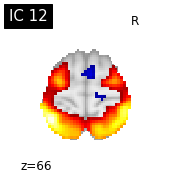

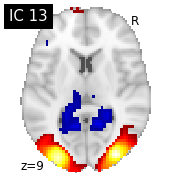

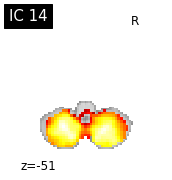

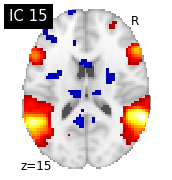

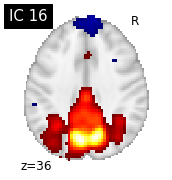

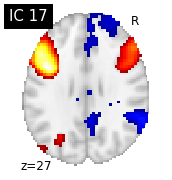

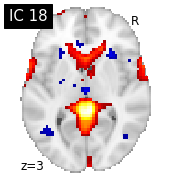

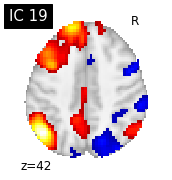

In [166]:
for i, cur_img in enumerate(image.iter_img(canica_components_img)):
    plotting.plot_stat_map(cur_img, display_mode='z', title='IC %d'%i, cut_coords=1, colorbar=False)